In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import matplotlib.pyplot as plt
import numpy as np
import pmath

# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# with open('input.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

# import importlib # for updating .py scripts

import os
from torch.utils.data import DataLoader, Dataset
from model_hyperbolic import GPT, GPTConfig  

# Results 

In [18]:
with open('data/tao.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    chars = sorted(list(set(data)))
    small_data = data[14:10095]
    small_val_data = data[10095:12900]
    
small_val_dataset = TaoTeChingDataset(small_val_data, block_size=128)
itos = small_val_dataset.itos
decode = lambda l: ''.join([itos[i] for i in l])
print(decode(small_val_dataset.data))

3. Who can (make) the muddy water (clear)?  Let it be still, and it
will gradually become clear.  Who can secure the condition of rest?
Let movement go on, and the condition of rest will gradually arise.

4. They who preserve this method of the Tao do not wish to be full (of
themselves).  It is through their not being full of themselves that
they can afford to seem worn and not appear new and complete.


16. 1. The (state of) vacancy should be brought to the utmost degree,
and that of stillness guarded with unwearying vigour.  All things
alike go through their processes of activity, and (then) we see them
return (to their original state).  When things (in the vegetable
world) have displayed their luxuriant growth, we see each of them
return to its root.  This returning to their root is what we call the
state of stillness; and that stillness may be called a reporting that
they have fulfilled their appointed end.

2. The report of that fulfilment is the regular, unchanging rule.  To
know

In [12]:
files = [f for f in os.listdir('out/') if f.endswith('tinystories ckpt.pt')]
# files = [files[1]]

In [13]:
plots = []

for file in files:
    chkpt = torch.load('out/' + file, map_location='cpu')
    mode = chkpt['model_args']['mode']
    for name in ['train_losses', 'val_losses']:
        plots.append((chkpt[name], name + ', ' + mode))

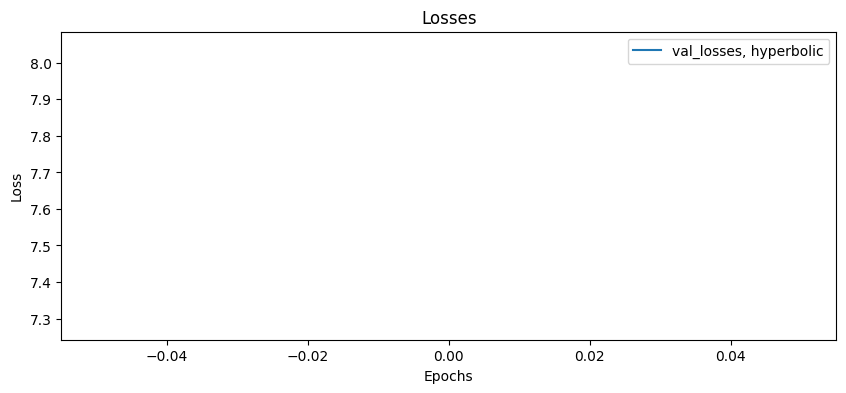

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
for plot, name in plots[1::2]:
    plt.plot(plot, label = name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
# plt.savefig('out/small_val_losses.png')
plt.show()

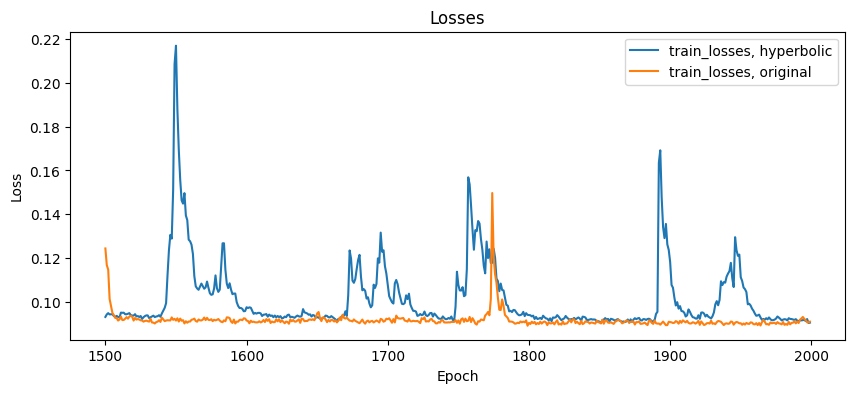

In [7]:
plt.figure(figsize=(10, 4))
for plot, name in plots[::2]:
    plt.plot(range(1500, 2000), plot[1500:], label = name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
# plt.savefig('out/overfit_train_losses_end.png')
plt.show()

## Generating

In [3]:
class TaoTeChingDataset(Dataset):
    def __init__(self, data, block_size):
        chars = sorted(list(set(data)))
        self.stoi = {ch: i for i, ch in enumerate(chars)}
        self.itos = {i: ch for i, ch in enumerate(chars)}
        self.block_size = block_size
        self.data = [self.stoi[ch] for ch in data]
        self.vocab_size = len(chars)

    def __len__(self):
        return len(self.data) - self.block_size

    def __getitem__(self, idx):
        chunk = self.data[idx:idx + self.block_size + 1]
        dix = torch.tensor(chunk[:-1], dtype=torch.long)
        target = torch.tensor(chunk[1:], dtype=torch.long)
        return dix, target

In [4]:
with open('data/tao.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    chars = sorted(list(set(data)))
    normal_data = data[10:15768]
#     overfit_val_data = data[306:474]

normal_dataset = TaoTeChingDataset(normal_data, block_size=128)
itos = normal_dataset.itos
decode = lambda l: ''.join([itos[i] for i in l])
# print('\n\nTrue\n', decode(normal_dataset.data))

In [8]:
chkpt = torch.load('out/' + files[0])
model = GPT(GPTConfig(**chkpt['model_args']))
model.load_state_dict(chkpt['model'])

context = torch.tensor([normal_dataset.data[10:100]], dtype=torch.long)
model.eval()
out = model.generate(context, max_new_tokens=500)
out = out[0].tolist()

# with open('data/tao.txt', 'r', encoding='utf-8') as f:
#     data = f.read()
#     chars = sorted(list(set(data)))
#     overfit_data = data[17:301]
# #     overfit_val_data = data[306:474]

# overfit_dataset = TaoTeChingDataset(overfit_data, block_size=32)
# itos = overfit_dataset.itos
# decode = lambda l: ''.join([itos[i] for i in l])
print(chkpt['model_args']['mode']+':\n\n', decode(out))
# print('\n\nTrue\n', decode(overfit_dataset.data))

original:

 Ch. 1. 1. The Tao that can be trodden is not the eglof whe it) whal lin (is tha w (speNhe ndure
weowetr a tsin plind the wonde p rausaf ut the cor.


EUn m we sot ity whecaote lls.
1.  Hoounce; w f lalthres ddears seids
; 1. Thertoe,  an ore che y tss clofules tis
ast as is ir) is wil ache ondey tor th (to (that hiow penducre
fedowh icaf tounen ald me don che).

2. Shin the wiwe l wheave thomp sunegh toulf
 a6.  5.
 Sof 1Lof adarsed cincong
Qus; Thethost w; s55. Tivearited TarMe ge fee, we besUng
3. Te I
 Tine Mhe spe atto ace. ' arin I
 Ino) h


In [9]:
chkpt = torch.load('out/' + files[1])
model = GPT(GPTConfig(**chkpt['model_args']))
model.load_state_dict(chkpt['model'])
context = torch.tensor([normal_dataset.data[10:100]], dtype=torch.long)
model.eval()
out = model.generate(context, max_new_tokens=500)
out = out[0].tolist()
print(chkpt['model_args']['mode']+':\n\n', decode(out))

number of parameters: 0.02M
original:

 Ch. 1. 1. The Tao that can be trodden is not the ee oabe ved tysurer an tyedopin, t ois ar; an o
vindot ad, itoren) wincit and acan an al bleiand iarse arWe conGle be g. aris
hareitofveng. tor Whige ths aw Ut an nto cho o ono Hof cldoot w f-eshitsutt angal t
tthese) ane and (wind (the thant alset to ano we.   mthe dam minaves io h wicth lo o is
ther, altit ar; thad hect (iss are ing ot sitinco ar ben acios,
ovech an, ghin ghang, weenos an-le) (of as cmendthis l ontheg
fidonllated. y Tacrerd the mpulthenoy wecallounce out o), insene w phe grlred


## Learned parameters

In [9]:
files

['04.14, 09-49, 3-dim, hyperbolic, tinystories ckpt.pt']

In [10]:
chkpt = torch.load('out/' + files[0])
model = GPT(GPTConfig(**chkpt['model_args']))

model.load_state_dict(chkpt['model'])

for i, block in enumerate(model.transformer.h):
    print(f"Layer {i+1}:")
    if hasattr(block.attn, 'c'):
        print(f"  c: {block.attn.c.item():.3f}")
    else:
        print("  c parameter not found.")

    if hasattr(block.attn, 'p'):
        print(f"  p: {block.attn.p.item():.1f}")
    else:
        print("  p parameter not found.")

number of parameters: 0.06M
Layer 1:
  c: 0.303
  p: 2.5
Layer 2:
  c: 0.271
  p: 2.5
Layer 3:
  c: 0.314
  p: 2.5
Layer 4:
  c: 0.298
  p: 2.5
Layer 5:
  c: 0.287
  p: 2.5
Layer 6:
  c: 0.315
  p: 2.5
Layer 7:
  c: 0.298
  p: 2.5
Layer 8:
  c: 0.297
  p: 2.5
